In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [2]:
diabets_classes = pd.read_csv('../../DATA/diabets_classes.csv', index_col=False)
diabets_x = diabets_classes.drop(['diabets'], axis=1)
diabets = diabets_classes['diabets']
pre_diabets_classes = pd.read_csv('../../DATA/pre_diabets_classes.csv', index_col=False)
pre_diabets_x = pre_diabets_classes.drop(['pre_diabets'], axis=1)
pre_diabets = pre_diabets_classes['pre_diabets']
non_diabets_classes = pd.read_csv('../../DATA/non_diabets_classes.csv', index_col=False)
non_diabets_x = non_diabets_classes.drop(['non_diabets'], axis=1)
non_diabets = non_diabets_classes['non_diabets']


In [3]:
x_diabets_train, x_diabets_test, y_diabets_train, y_diabets_test = train_test_split(diabets_x, diabets, test_size=0.25)
x_pre_diabets_train, x_pre_diabets_test, y_pre_diabets_train, y_pre_diabets_test = train_test_split(pre_diabets_x, pre_diabets, test_size=0.25)
x_non_diabets_train, x_non_diabets_test, y_non_diabets_train, y_non_diabets_test = train_test_split(non_diabets_x, non_diabets, test_size=0.25)

In [4]:
def show_regression_params(lr, c):
    print(abs(lr.best_estimator_.coef_).mean(axis=0))
    plt.bar(c, abs(lr.best_estimator_.coef_).mean(axis=0))
    plt.xticks(rotation=90)
    plt.axhline(abs(lr.best_estimator_.coef_).mean(axis=0).mean(), color='red')
    plt.axhline(np.median(abs(lr.best_estimator_.coef_).mean(axis=0)), color='green')


# Diabets KNN

In [5]:
diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                        {'C': [1e-5, 1e-4, 1e-3,
                                               1e-2, 1e-1, 1, 10, 100]},
                                        n_jobs=4,
                                        scoring='accuracy'
                                        ).fit(x_diabets_train, y_diabets_train)

# 6 min


KeyboardInterrupt: 

In [ ]:
diabets_predict = diabets_classifier.predict(x_diabets_test)
# 1 min


[2.34159047e-01 4.21065549e-01 9.19359493e-01 4.27815248e+00
 3.13846312e-02 1.42823347e-01 9.98807173e-02 4.70238203e-02
 3.05939013e-03 6.14362577e-02 6.43132390e-02 9.57955642e-02
 4.20450601e-01 8.71498160e-01 3.31966011e-01 1.48384980e-01
 8.32779065e-02 4.19451172e-02 1.48627557e+00 2.32850398e-01
 3.10821506e-01]


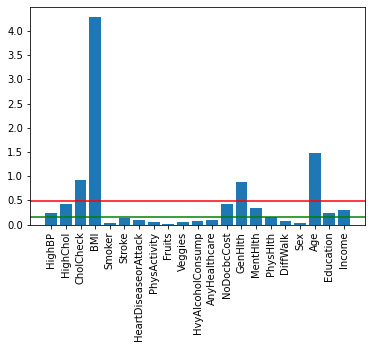

In [ ]:
show_regression_params(diabets_classifier, x_diabets_train.columns)


In [ ]:
print(classification_report(diabets_predict, y_diabets_test))


              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62      1063
         1.0       0.68      0.62      0.65      1253

    accuracy                           0.63      2316
   macro avg       0.63      0.64      0.63      2316
weighted avg       0.64      0.63      0.63      2316



# Prediabets KNN

In [ ]:
pre_diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                              {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
                                              n_jobs=4,
                                              scoring='accuracy'
                                              ).fit(x_pre_diabets_train, y_pre_diabets_train)
# 6 min


In [ ]:
GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                              {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
                                              n_jobs=4,
                                              scoring='accuracy'
                                              ).fit(x_pre_diabets_train, y_pre_diabets_train)
# 6 min


GridSearchCV(estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
pre_diabets_predict = diabets_classifier.predict(x_pre_diabets_test)
# 1 min


[7.07728929e-01 5.76207472e-01 1.37109228e+00 6.35194928e+00
 1.26343243e-03 2.33842322e-01 2.46759135e-01 6.43113039e-02
 5.49226936e-02 1.11161700e-02 7.12651237e-01 2.11021372e-03
 3.72553873e-02 2.32911927e+00 1.64070296e-01 1.95743295e-01
 7.30136748e-02 2.63312587e-01 1.79945387e+00 2.21058918e-01
 4.25302596e-01]


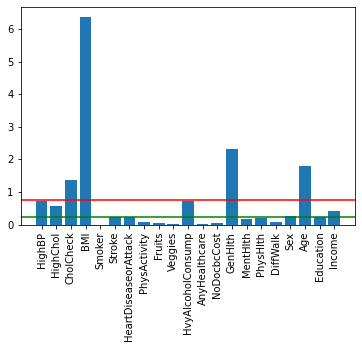

In [ ]:
show_regression_params(pre_diabets_classifier, x_pre_diabets_train.columns)


In [ ]:
print(classification_report(pre_diabets_predict, y_pre_diabets_test))


              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72      7825
         1.0       0.79      0.71      0.75      9848

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



# Nondiabets KNN

In [ ]:
non_diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                      {'C': [1e-5, 1e-4, 1e-3,
                                             1e-2, 1e-1, 1, 10, 100]},
                                      n_jobs=4,
                                      scoring='accuracy'
                                      ).fit(x_non_diabets_train, y_non_diabets_train)


[0.72154879 0.60660846 1.12520982 4.90364427 0.02010469 0.11146749
 0.20562032 0.03787972 0.04566815 0.03047903 0.67640808 0.03969813
 0.07974496 2.0549618  0.04842964 0.22593207 0.12746163 0.22657286
 1.43795689 0.19094629 0.37942906]


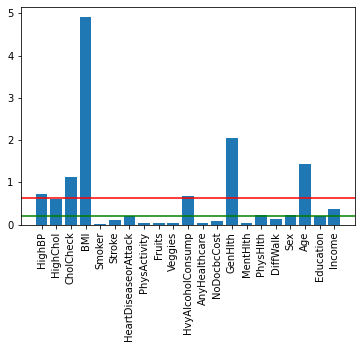

In [ ]:
show_regression_params(non_diabets_classifier, x_non_diabets_train.columns)


In [ ]:
non_diabets_predict = diabets_classifier.predict(x_non_diabets_test)
# 1 min


In [ ]:
print(classification_report(non_diabets_predict, y_non_diabets_test))


              precision    recall  f1-score   support

         0.0       0.22      0.06      0.09     39065
         1.0       0.31      0.68      0.43     24355

    accuracy                           0.30     63420
   macro avg       0.27      0.37      0.26     63420
weighted avg       0.26      0.30      0.22     63420

